<a href="https://colab.research.google.com/github/MicroPyscho/MicroPyscho/blob/main/Double_log1p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["JOBLIB_START_METHOD"] = "forkserver"

In [ ]:
!pip install tensorflow
!pip install tensorflow_addons
!pip install ranger-adabelief


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from torch import nn

In [4]:
int_cols = pd.read_csv("/content/drive/MyDrive/int_cols.csv").replace([np.inf, -np.inf], np.nan)

if "Unnamed: 0" in int_cols.columns:
  int_cols.drop(columns =["Unnamed: 0"], inplace=True)

In [5]:
int_cols

,ICBIC,startyear,INCORP,year,market_value,price_index,return_index,net_revenue,R&D,working_capital,...,gdp_prfmnce_rank,eco_soc_gov_fctrs,dvsrty&inclsn_score,total_emissns,Net_FDI_GDP,avg_EPS,DCred2PrvSctr_GDP,agg_net_cash_flow,operating_profit,abs_sales_growth
0,0.925237,1.148325,1.148069,1.148380,1.203783,0.949083,0.958289,1.345135,0.0,1.307008,...,0.978567,0.984300,0.786048,1.329394,0.000000,0.000000,0.000000,1.288887,1.279141,0.0
1,0.953860,1.148069,1.147624,1.148380,1.137220,1.010989,1.053900,1.330137,0.0,1.323863,...,0.978567,0.984300,0.786048,1.330269,0.000000,0.000000,0.000000,1.288887,1.279141,0.0
2,0.953860,1.148105,1.147568,1.148380,1.087010,0.851732,0.938266,1.291240,0.0,1.272763,...,0.978567,0.984300,0.786048,1.330269,0.000000,0.000000,0.000000,1.256906,1.279141,0.0
3,0.953860,1.148105,1.147418,1.148380,1.112604,0.786048,0.874370,1.273675,0.0,1.219334,...,0.978567,0.984300,0.786048,1.330269,0.000000,0.000000,0.000000,1.288887,1.279141,0.0
4,0.953860,1.148069,1.147587,1.148380,1.072715,0.943907,0.997191,1.286838,0.0,1.208314,...,0.978567,0.984300,0.786048,1.330269,0.000000,0.000000,0.000000,1.232573,1.279141,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88229,0.945681,1.148252,1.147903,1.148398,0.912001,0.837467,0.837467,1.334603,0.0,1.303289,...,0.966273,0.879129,0.920250,1.323469,0.000000,0.000000,0.122777,1.273464,1.279141,0.0
88230,0.945681,1.148216,1.147903,1.148416,1.057966,0.967505,0.971052,1.278637,0.0,1.298310,...,0.940202,0.895607,0.920250,1.323469,0.423036,0.000000,0.122777,1.231691,1.279141,0.0
88231,0.961071,1.148216,1.147903,1.148416,1.183797,1.065460,1.083157,1.335040,0.0,1.316248,...,0.940202,0.895607,0.920250,1.323469,0.423036,0.423036,0.122777,1.280794,1.279141,0.0
88232,0.945681,1.148252,1.147903,1.148416,0.912001,0.837467,0.837467,1.335900,0.0,1.307940,...,0.940202,0.895607,0.920250,1.323469,0.423036,0.000000,0.122777,1.297612,1.279141,0.0


Linear Regression with Regularization (Ridge and Lasso)

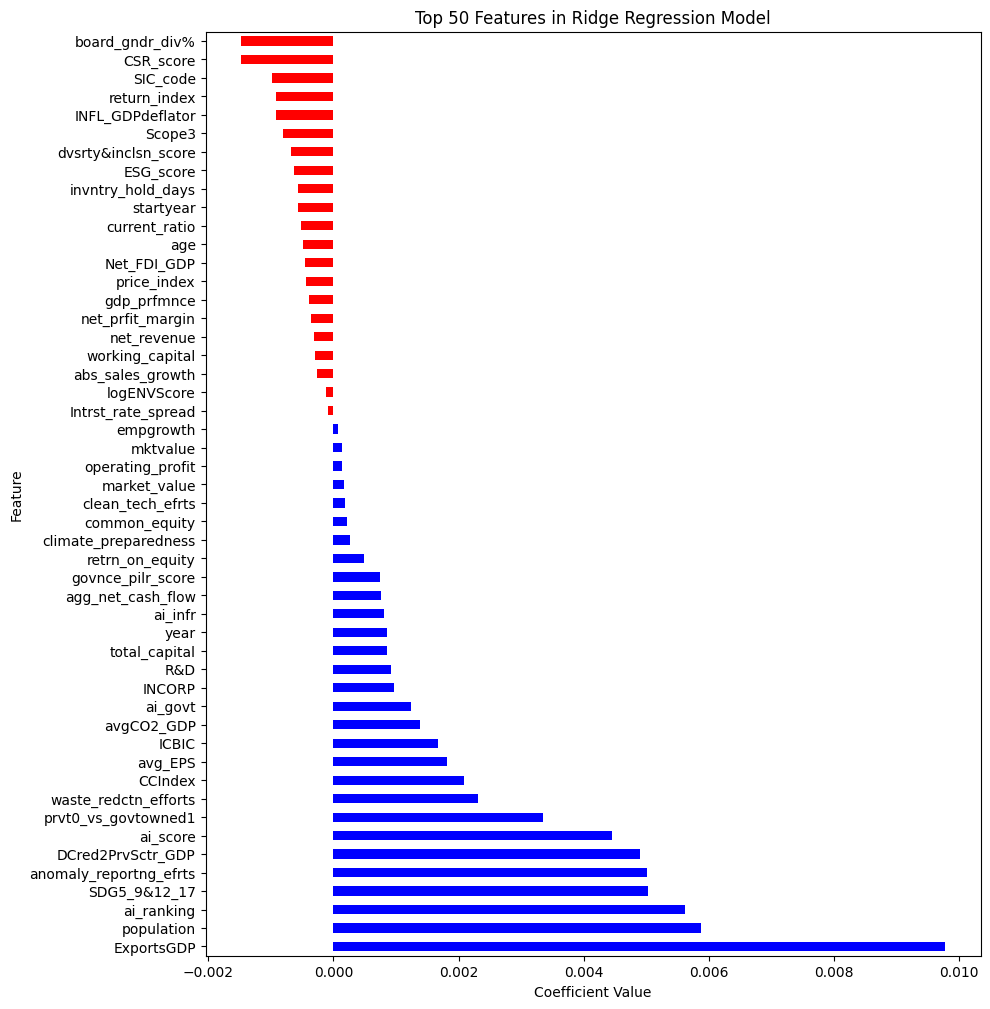

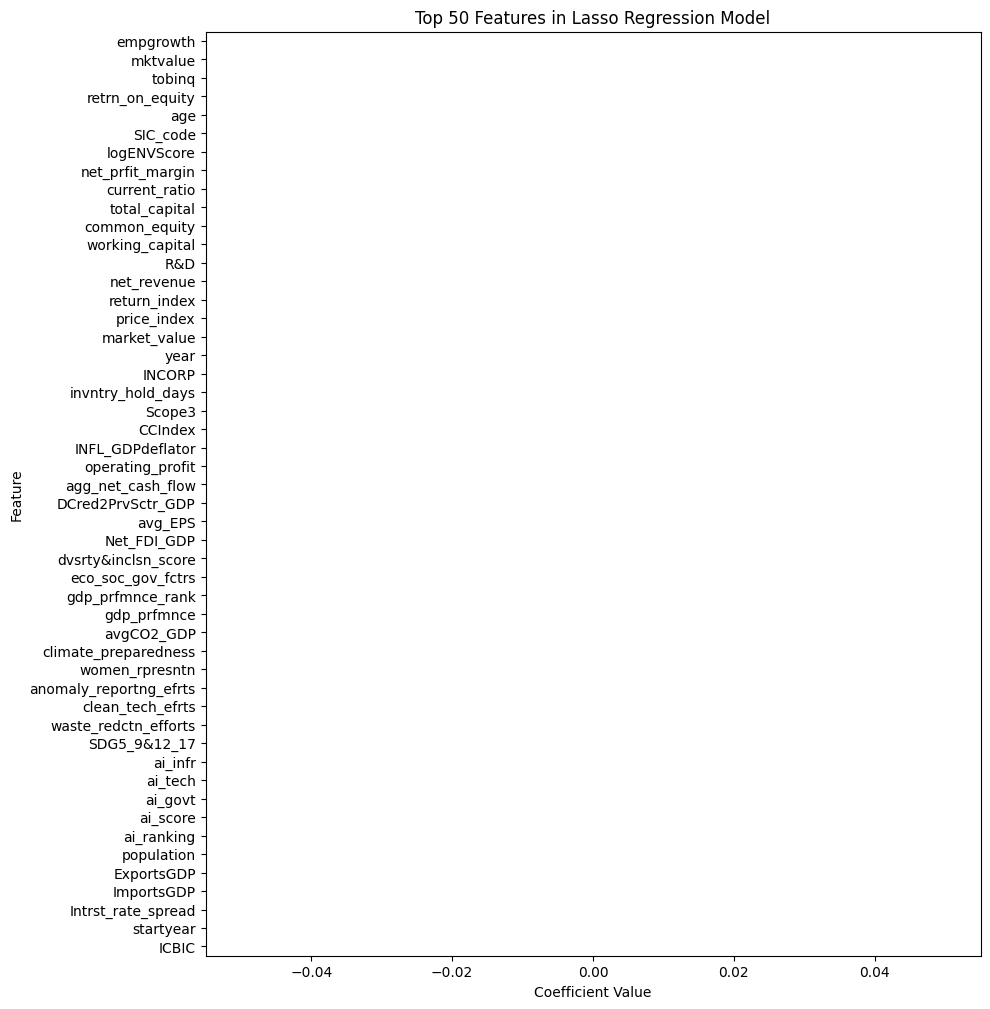

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = int_cols.drop(columns=["total_emissns", "Emission_objtv", "emissn_score", "dirct_cemissions", "indirct_cemissions", "Grenhous_emissn", "CO2Emissn_%+-", "scope1", "scope2", "total_enrgy_use", "renwbl_enrgy_use", "envrmt_pilr_score", "Climate_incentive"])
Y = int_cols["total_emissns"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_scaled, Y_train)
Y_pred_train_ridge = ridge_regressor.predict(X_train_scaled)
Y_pred_test_ridge = ridge_regressor.predict(X_test_scaled)

# Lasso Regression
lasso_regressor = Lasso(alpha=0.01, max_iter=10000)
lasso_regressor.fit(X_train_scaled, Y_train)
Y_pred_train_lasso = lasso_regressor.predict(X_train_scaled)
Y_pred_test_lasso = lasso_regressor.predict(X_test_scaled)

# Save the table of actual vs predicted
results_ridge = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_ridge})
results_ridge.to_csv('ridge_actual_vs_predicted.csv', index=False)

results_lasso = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_lasso})
results_lasso.to_csv('lasso_actual_vs_predicted.csv', index=False)

# Evaluate model performance using state-of-the-art 2024 methods
evaluation_metrics = ['mean_squared_error', 'r2_score', 'mean_absolute_error']
ridge_evaluation = {
    'Train MSE': mean_squared_error(Y_train, Y_pred_train_ridge),
    'Test MSE': mean_squared_error(Y_test, Y_pred_test_ridge),
    'Train R2': r2_score(Y_train, Y_pred_train_ridge),
    'Test R2': r2_score(Y_test, Y_pred_test_ridge),
    'Train MAE': mean_absolute_error(Y_train, Y_pred_train_ridge),
    'Test MAE': mean_absolute_error(Y_test, Y_pred_test_ridge)
}

lasso_evaluation = {
    'Train MSE': mean_squared_error(Y_train, Y_pred_train_lasso),
    'Test MSE': mean_squared_error(Y_test, Y_pred_test_lasso),
    'Train R2': r2_score(Y_train, Y_pred_train_lasso),
    'Test R2': r2_score(Y_test, Y_pred_test_lasso),
    'Train MAE': mean_absolute_error(Y_train, Y_pred_train_lasso),
    'Test MAE': mean_absolute_error(Y_test, Y_pred_test_lasso)
}

evaluation = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    **{key: [ridge_evaluation[key], lasso_evaluation[key]] for key in ridge_evaluation}
})
evaluation.to_csv('linear_models_evaluation.csv', index=False)

# Plot top 50 features for Ridge
ridge_coef = pd.Series(ridge_regressor.coef_, index=X.columns).sort_values(ascending=False)
top_50_features_ridge = ridge_coef.head(50)

plt.figure(figsize=(10, 12))
colors = ['blue' if c > 0 else 'red' for c in top_50_features_ridge]
top_50_features_ridge.plot(kind='barh', color=colors)
plt.title('Top 50 Features in Ridge Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.savefig('top_50_features_ridge.png', bbox_inches='tight')
plt.show()

# Plot top 50 features for Lasso
lasso_coef = pd.Series(lasso_regressor.coef_, index=X.columns).sort_values(ascending=False)
top_50_features_lasso = lasso_coef.head(50)

plt.figure(figsize=(10, 12))
colors = ['blue' if c > 0 else 'red' for c in top_50_features_lasso]
top_50_features_lasso.plot(kind='barh', color=colors)
plt.title('Top 50 Features in Lasso Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.savefig('top_50_features_lasso.png', bbox_inches='tight')
plt.show()


Generalized Linear Model (GLM)

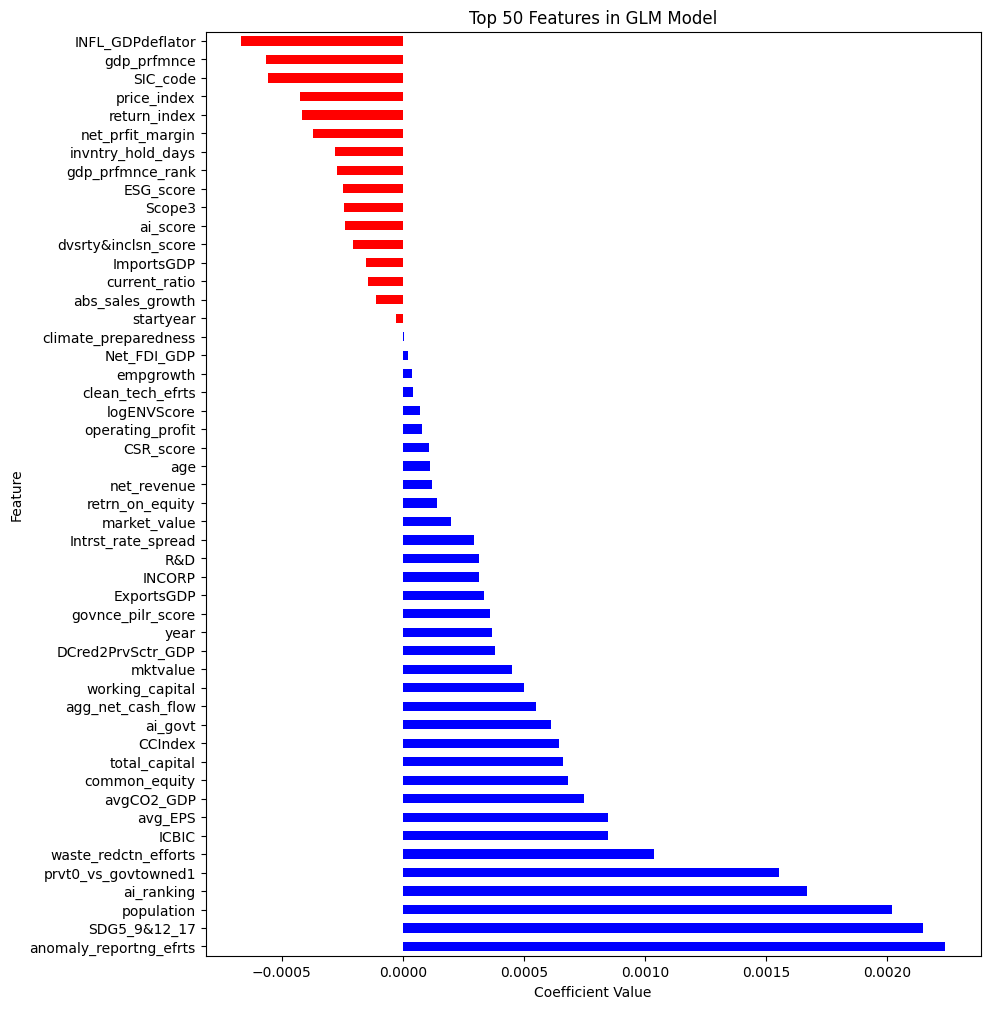

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = int_cols.drop(columns=["total_emissns", "Emission_objtv", "emissn_score", "dirct_cemissions", "indirct_cemissions", "Grenhous_emissn", "CO2Emissn_%+-", "scope1", "scope2", "total_enrgy_use", "renwbl_enrgy_use", "envrmt_pilr_score", "Climate_incentive"])
Y = int_cols["total_emissns"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GLM (Poisson Regression)
glm_regressor = PoissonRegressor()
glm_regressor.fit(X_train_scaled, Y_train)
Y_pred_train_glm = glm_regressor.predict(X_train_scaled)
Y_pred_test_glm = glm_regressor.predict(X_test_scaled)

# Save the table of actual vs predicted
results_glm = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_glm})
results_glm.to_csv('glm_actual_vs_predicted.csv', index=False)

# Evaluate model performance
glm_evaluation = {
    'Train MSE': mean_squared_error(Y_train, Y_pred_train_glm),
    'Test MSE': mean_squared_error(Y_test, Y_pred_test_glm),
    'Train R2': r2_score(Y_train, Y_pred_train_glm),
    'Test R2': r2_score(Y_test, Y_pred_test_glm),
    'Train MAE': mean_absolute_error(Y_train, Y_pred_train_glm),
    'Test MAE': mean_absolute_error(Y_test, Y_pred_test_glm)
}

evaluation = pd.DataFrame({
    'Model': ['GLM'],
    **{key: [glm_evaluation[key]] for key in glm_evaluation}
})
evaluation.to_csv('glm_model_evaluation.csv', index=False)

# Plot top 50 features for GLM
glm_coef = pd.Series(glm_regressor.coef_, index=X.columns).sort_values(ascending=False)
top_50_features_glm = glm_coef.head(50)

plt.figure(figsize=(10, 12))
colors = ['blue' if c > 0 else 'red' for c in top_50_features_glm]
top_50_features_glm.plot(kind='barh', color=colors)
plt.title('Top 50 Features in GLM Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.savefig('top_50_features_glm.png', bbox_inches='tight')
plt.show()
#[::-1]


 Gradient Boosting Machines (GBM)

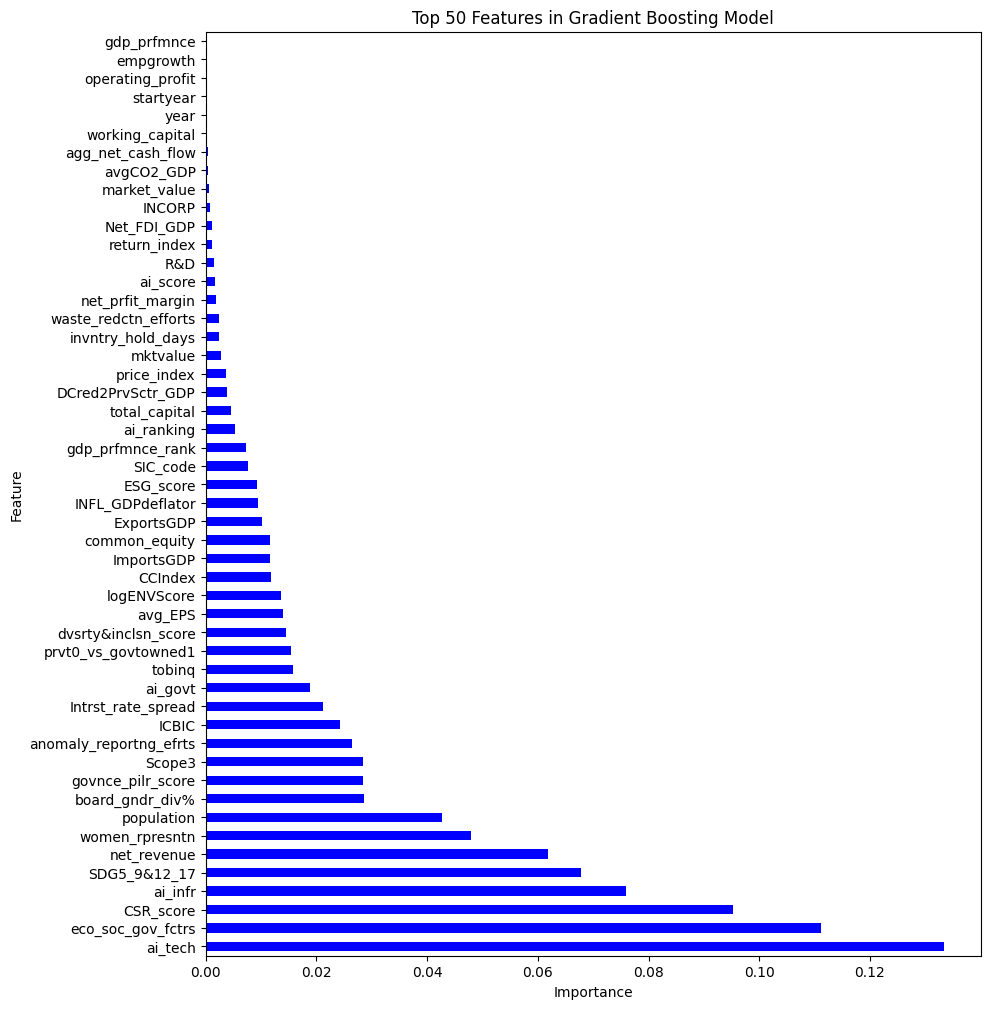

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = int_cols.drop(columns=["total_emissns", "Emission_objtv", "emissn_score", "dirct_cemissions", "indirct_cemissions", "Grenhous_emissn", "CO2Emissn_%+-", "scope1", "scope2", "total_enrgy_use", "renwbl_enrgy_use", "envrmt_pilr_score", "Climate_incentive"])
Y = int_cols["total_emissns"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_scaled, Y_train)
Y_pred_train_gb = gb_regressor.predict(X_train_scaled)
Y_pred_test_gb = gb_regressor.predict(X_test_scaled)

# Save the table of actual vs predicted
results_gb = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_gb})
results_gb.to_csv('gb_actual_vs_predicted.csv', index=False)

# Evaluate model performance
gb_evaluation = {
    'Train MSE': mean_squared_error(Y_train, Y_pred_train_gb),
    'Test MSE': mean_squared_error(Y_test, Y_pred_test_gb),
    'Train R2': r2_score(Y_train, Y_pred_train_gb),
    'Test R2': r2_score(Y_test, Y_pred_test_gb),
    'Train MAE': mean_absolute_error(Y_train, Y_pred_train_gb),
    'Test MAE': mean_absolute_error(Y_test, Y_pred_test_gb)
}

evaluation = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    **{key: [gb_evaluation[key]] for key in gb_evaluation}
})
evaluation.to_csv('gb_model_evaluation.csv', index=False)

# Plot top 50 features for Gradient Boosting
gb_importances = pd.Series(gb_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
top_50_features_gb = gb_importances.head(50)

plt.figure(figsize=(10, 12))
colors = ['blue' if gb_importances[f] > 0 else 'red' for f in top_50_features_gb.index]
top_50_features_gb.plot(kind='barh', color=colors)
plt.title('Top 50 Features in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('top_50_features_gb.png', bbox_inches='tight')
plt.show()
#[::-1]


Neural Networks (Deep Learning)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

# Define a custom scoring function for the Keras model
def keras_scoring(estimator, X, y):
    y_pred = estimator.predict(X).flatten()
    return -mean_squared_error(y, y_pred)  # Negative MSE since permutation_importance expects higher values to be better

# Data preparation
X = int_cols.drop(columns=["total_emissns", "Emission_objtv", "emissn_score", "dirct_cemissions", "indirct_cemissions", "Grenhous_emissn", "CO2Emissn_%+-", "scope1", "scope2", "total_enrgy_use", "renwbl_enrgy_use", "envrmt_pilr_score", "Climate_incentive"])
Y = int_cols["total_emissns"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network with RAdam and Lookahead optimizer
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation ='relu'),
    Dense(1)
])

# Initialize RAdam optimizer with learning rate
radam_optimizer = tfa.optimizers.RectifiedAdam(learning_rate=0.001)
# Wrap RAdam with Lookahead
lookahead_optimizer = tfa.optimizers.Lookahead(radam_optimizer, sync_period=5)
# Compile the model
model.compile(optimizer=lookahead_optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, Y_train, epochs=144, batch_size=36, validation_split=0.2, verbose=1)

# Predictions
Y_pred_train_nn = model.predict(X_train_scaled).flatten()
Y_pred_test_nn = model.predict(X_test_scaled).flatten()

# Model evaluation metrics
train_mse = mean_squared_error(Y_train, Y_pred_train_nn)
test_mse = mean_squared_error(Y_test, Y_pred_test_nn)
train_r2 = r2_score(Y_train, Y_pred_train_nn)
test_r2 = r2_score(Y_test, Y_pred_test_nn)
train_mae = mean_absolute_error(Y_train, Y_pred_train_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_test_nn)

print("Neural Network Model Evaluation Metrics:")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R-squared Score: {train_r2}")
print(f"Test R-squared Score: {test_r2}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

# Actual vs predicted figures
results_nn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_nn})
print("\nActual vs Predicted Figures:")
print(results_nn.head())

# Calculate permutation importance using the custom scoring function
result = permutation_importance(model, X_test_scaled, Y_test, scoring=keras_scoring, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()[-50:]

plt.figure(figsize=(10, 12))
plt.barh(range(50), result.importances_mean[sorted_idx], align='center', color=['blue' if result.importances_mean[i] > 0 else 'red' for i in sorted_idx])
plt.yticks(range(50), [X.columns[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 50 Features in Neural Network Model")
plt.savefig('top_50_features_nn.png', bbox_inches='tight')
plt.show()


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/144
1373/1373 [==============================] - 7s 4ms/step - loss: 0.0988 - mae: 0.1661 - val_loss: 0.0147 - val_mae: 0.0742
Epoch 2/144
1373/1373 [==============================] - 7s 5ms/step - loss: 0.0105 - mae: 0.0621 - val_loss: 0.0877 - val_mae: 0.0533
Epoch 3/144
1373/1373 [==============================] - 5s 4ms/step - loss: 0.0190 - mae: 0.0511 - val_loss: 0.0132 - val_mae: 0.0468
Epoch 4/144
1373/1373 [==============================] - 11s 8ms/step - loss: 0.0059 - mae: 0.0411 - val_loss: 0.0178 - val_mae: 0.0385
Epoch 5/144
1373/1373 [==============================] - 6s 4ms/step - loss: 0.0066 - mae: 0.0363 - val_loss: 0.0049 - val_mae: 0.0340
Epoch 6/144
1373/1373 [==============================] - 10s 7ms/step - loss: 0.0034 - mae: 0.0337 - val_loss: 0.0090 - val_mae: 0.0326
Epoch 7/144
1373/1373 [==============================] - 5s 4ms/step - loss: 0.0034 - mae: 0.0336 - val_loss: 0.0021 - val_mae: 0.0310
Epoch 8/144
1373/1373 [==============================

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

 Random Forest Regression

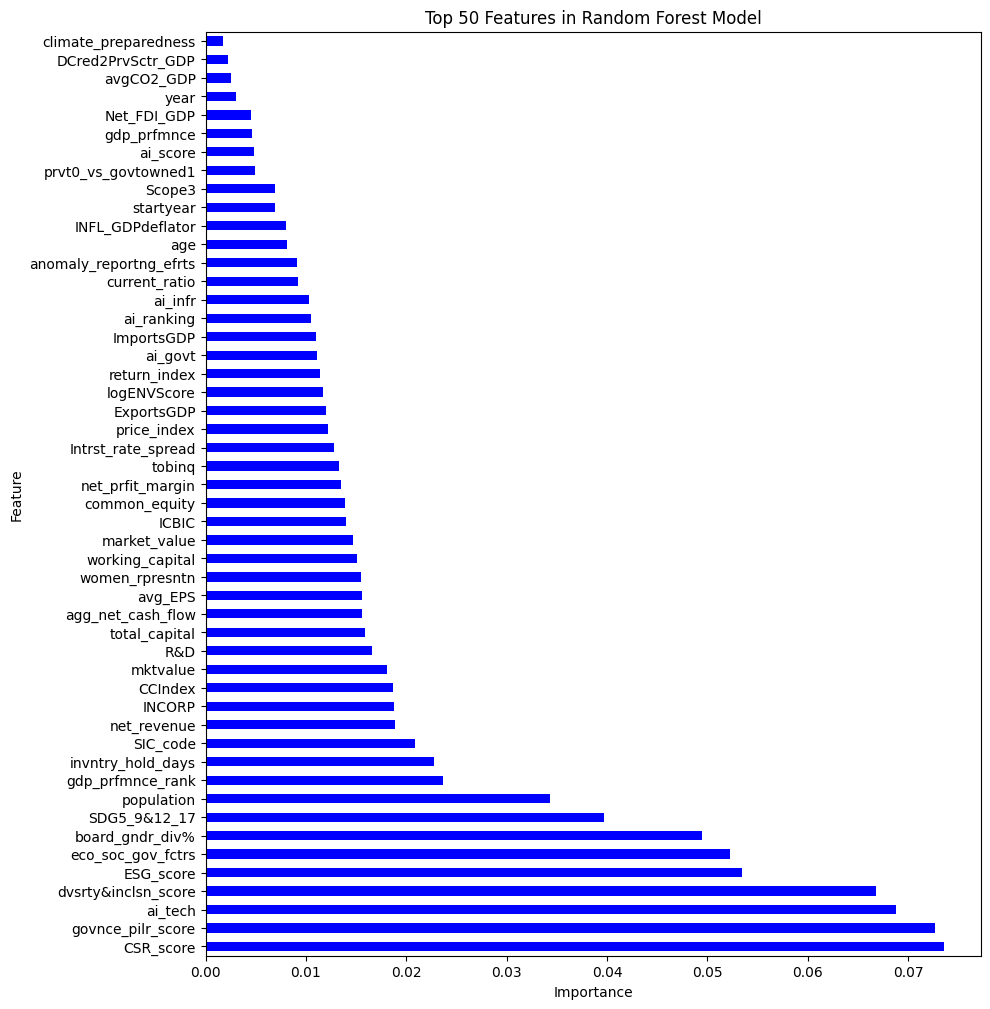

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = int_cols.drop(columns=["total_emissns", "Emission_objtv", "emissn_score", "dirct_cemissions", "indirct_cemissions", "Grenhous_emissn", "CO2Emissn_%+-", "scope1", "scope2", "total_enrgy_use", "renwbl_enrgy_use", "envrmt_pilr_score", "Climate_incentive"])
Y = int_cols["total_emissns"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regression
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, Y_train)
Y_pred_train_rf = rf_regressor.predict(X_train_scaled)
Y_pred_test_rf = rf_regressor.predict(X_test_scaled)

# Save the table of actual vs predicted
results_rf = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_rf})
results_rf.to_csv('rf_actual_vs_predicted.csv', index=False)

# Evaluate model performance
rf_evaluation = {
    'Train MSE': mean_squared_error(Y_train, Y_pred_train_rf),
    'Test MSE': mean_squared_error(Y_test, Y_pred_test_rf),
    'Train R2': r2_score(Y_train, Y_pred_train_rf),
    'Test R2': r2_score(Y_test, Y_pred_test_rf),
    'Train MAE': mean_absolute_error(Y_train, Y_pred_train_rf),
    'Test MAE': mean_absolute_error(Y_test, Y_pred_test_rf)
}

evaluation = pd.DataFrame({
    'Model': ['Random Forest'],
    **{key: [rf_evaluation[key]] for key in rf_evaluation}
})
evaluation.to_csv('rf_model_evaluation.csv', index=False)

# Plot top 50 features for Random Forest
rf_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
top_50_features_rf = rf_importances.head(50)

plt.figure(figsize=(10, 12))
colors = ['blue' if rf_importances[f] > 0 else 'red' for f in top_50_features_rf.index]
top_50_features_rf.plot(kind='barh', color=colors)
plt.title('Top 50 Features in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('top_50_features_rf.png', bbox_inches='tight')
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

# Data preparation
X = int_cols.drop(columns=["total_emissns", "Emission_objtv", "emissn_score", "dirct_cemissions", "indirct_cemissions", "Grenhous_emissn", "CO2Emissn_%+-", "scope1", "scope2", "total_enrgy_use", "renwbl_enrgy_use", "envrmt_pilr_score", "Climate_incentive"])
Y = int_cols["total_emissns"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge and Lasso Regression with Hyperparameter Tuning
ridge = Ridge()
lasso = Lasso()

# Ridge hyperparameter tuning
ridge_params = {'alpha': np.logspace(-6, 6, 13)}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, Y_train)
best_ridge = ridge_grid.best_estimator_

# Lasso hyperparameter tuning
lasso_params = {'alpha': np.logspace(-6, 6, 13)}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, Y_train)
best_lasso = lasso_grid.best_estimator_

# Evaluate Ridge
ridge_train_pred = best_ridge.predict(X_train_scaled)
ridge_test_pred = best_ridge.predict(X_test_scaled)
ridge_train_mse = mean_squared_error(Y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(Y_test, ridge_test_pred)
ridge_train_r2 = r2_score(Y_train, ridge_train_pred)
ridge_test_r2 = r2_score(Y_test, ridge_test_pred)

# Evaluate Lasso
lasso_train_pred = best_lasso.predict(X_train_scaled)
lasso_test_pred = best_lasso.predict(X_test_scaled)
lasso_train_mse = mean_squared_error(Y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(Y_test, lasso_test_pred)
lasso_train_r2 = r2_score(Y_train, lasso_train_pred)
lasso_test_r2 = r2_score(Y_test, lasso_test_pred)

print("Ridge Model Evaluation:")
print(f"Train MSE: {ridge_train_mse}")
print(f"Test MSE: {ridge_test_mse}")
print(f"Train R-squared: {ridge_train_r2}")
print(f"Test R-squared: {ridge_test_r2}")

print("\nLasso Model Evaluation:")
print(f"Train MSE: {lasso_train_mse}")
print(f"Test MSE: {lasso_test_mse}")
print(f"Train R-squared: {lasso_train_r2}")
print(f"Test R-squared: {lasso_test_r2}")

# GLM using Poisson regression as an example
from sklearn.linear_model import PoissonRegressor

glm = PoissonRegressor()
glm_params = {'alpha': np.logspace(-6, 6, 13)}
glm_grid = GridSearchCV(glm, glm_params, cv=5, scoring='r2')
glm_grid.fit(X_train_scaled, Y_train)
best_glm = glm_grid.best_estimator_

# Evaluate GLM
glm_train_pred = best_glm.predict(X_train_scaled)
glm_test_pred = best_glm.predict(X_test_scaled)
glm_train_mse = mean_squared_error(Y_train, glm_train_pred)
glm_test_mse = mean_squared_error(Y_test, glm_test_pred)
glm_train_r2 = r2_score(Y_train, glm_train_pred)
glm_test_r2 = r2_score(Y_test, glm_test_pred)

print("\nGLM Model Evaluation:")
print(f"Train MSE: {glm_train_mse}")
print(f"Test MSE: {glm_test_mse}")
print(f"Train R-squared: {glm_train_r2}")
print(f"Test R-squared: {glm_test_r2}")

# Neural Network with Lookahead and RAdam
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Using Lookahead with RAdam
radam = tfa.optimizers.RectifiedAdam(learning_rate=0.001)
lookahead = tfa.optimizers.Lookahead(radam, sync_period=5, slow_step=0.5)
model.compile(optimizer=lookahead, loss='mse', metrics=['mae'])

# Learning rate scheduler callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)

history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[lr_schedule])

# Predictions
Y_pred_train_nn = model.predict(X_train_scaled).flatten()
Y_pred_test_nn = model.predict(X_test_scaled).flatten()

# Model evaluation metrics
train_mse = mean_squared_error(Y_train, Y_pred_train_nn)
test_mse = mean_squared_error(Y_test, Y_pred_test_nn)
train_r2 = r2_score(Y_train, Y_pred_train_nn)
test_r2 = r2_score(Y_test, Y_pred_test_nn)
train_mae = mean_absolute_error(Y_train, Y_pred_train_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_test_nn)

print("\nNeural Network Model Evaluation:")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R-squared Score: {train_r2}")
print(f"Test R-squared Score: {test_r2}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

# Actual vs predicted figures
results_nn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test_nn})
print("\nActual vs Predicted Figures:")
print(results_nn.head())

# Calculate permutation importance using the custom scoring function
result = permutation_importance(model, X_test_scaled, Y_test, scoring=keras_scoring, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()[-50:]

plt.figure(figsize=(10, 12))
plt.barh(range(50), result.importances_mean[sorted_idx], align='center', color=['blue' if result.importances_mean[i] > 0 else 'red' for i in sorted_idx])
plt.yticks(range(50), [X.columns[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 50 Features in Neural Network Model")
plt.savefig('top_50_features_nn.png', bbox_inches='tight')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e-01, tolerance: 9.422e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e-01, tolerance: 9.576e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.814e-02, tolerance: 9.396e

Ridge Model Evaluation:
Train MSE: 0.001620215567158045
Test MSE: 0.001646406488600256
Train R-squared: 0.1540477591058862
Test R-squared: 0.15470453171275345

Lasso Model Evaluation:
Train MSE: 0.0016202336530123167
Test MSE: 0.0016463795176132965
Train R-squared: 0.15403831606061502
Test R-squared: 0.1547183791150869

GLM Model Evaluation:
Train MSE: 0.0016220807136473952
Test MSE: 0.0016478664409107502
Train R-squared: 0.1530739227323541
Test R-squared: 0.15395496525968055


TypeError: Unexpected keyword argument passed to optimizer: slow_step. Allowed kwargs are {'clipnorm', 'decay', 'global_clipnorm', 'lr', 'clipvalue'}.

In [12]:
# Ridge Evaluation
ridge_evaluation = pd.DataFrame({
    'Model': ['Ridge'],
    **{key: [ridge_evaluation[key]] for key in ridge_evaluation}
})
print("Ridge Model Evaluation:")
print(ridge_evaluation)

# Lasso Evaluation
lasso_evaluation = pd.DataFrame({
    'Model': ['Lasso'],
    **{key: [lasso_evaluation[key]] for key in lasso_evaluation}
})
print("Lasso Model Evaluation:")
print(lasso_evaluation)

# GLM Evaluation
glm_evaluation = pd.DataFrame({
    'Model': ['GLM'],
    **{key: [glm_evaluation[key]] for key in glm_evaluation}
})
print("GLM Model Evaluation:")
print(glm_evaluation)

# Random Forest Evaluation
rf_evaluation = pd.DataFrame({
    'Model': ['Random Forest'],
    **{key: [rf_evaluation[key]] for key in rf_evaluation}
})
print("Random Forest Model Evaluation:")
print(rf_evaluation)

# Gradient Boosting Evaluation
gb_evaluation = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    **{key: [gb_evaluation[key]] for key in gb_evaluation}
})
print("Gradient Boosting Model Evaluation:")
print(gb_evaluation)

# Neural Network Evaluation
nn_evaluation = pd.DataFrame({
    'Model': ['Neural Network'],
    **{key: [nn_evaluation[key]] for key in nn_evaluation}
})
print("Neural Network Model Evaluation:")
print(nn_evaluation)

# Print actual vs predicted results
print("Ridge Actual vs Predicted:")
print(results_ridge.head())
print("\nLasso Actual vs Predicted:")
print(results_lasso.head())
print("\nGLM Actual vs Predicted:")
print(results_glm.head())
print("\nRandom Forest Actual vs Predicted:")
print(results_rf.head())
print("\nGradient Boosting Actual vs Predicted:")
print(results_gb.head())
print("\nNeural Network Actual vs Predicted:")
print(results_nn.head())


Ridge Model Evaluation:
                                   Model  \
0  0    Ridge
Name: Model, dtype: object   

                                      Train MSE  \
0  0    0.00162
Name: Train MSE, dtype: float64   

                                       Test MSE  \
0  0    0.001646
Name: Test MSE, dtype: float64   

                                       Train R2  \
0  0    0.154057
Name: Train R2, dtype: float64   

                                       Test R2  \
0  0    0.154725
Name: Test R2, dtype: float64   

                                       Train MAE  \
0  0    0.029861
Name: Train MAE, dtype: float64   

                                       Test MAE  
0  0    0.029994
Name: Test MAE, dtype: float64  
Lasso Model Evaluation:
                                   Model  \
0  0    Lasso
Name: Model, dtype: object   

                                       Train MSE  \
0  0    0.001915
Name: Train MSE, dtype: float64   

                                       Test MSE  \
0  

NameError: name 'nn_evaluation' is not defined